<h2>Business Understanding</h2>
Before trying to build a model, it is crucial to first understand the business need behind the solution that we will attempt to solve.

<h4>Assess Situation:</h4>
The dataset contains the scores of 120 patients on the 17 essential symptoms psychiatrists use to diagnose the described disorders, which are Bipolar Disorder Type-1, Bipolar Disorder Type-2 and Major Depressive Disorder. The behavioral symptoms are considered according to the levels of: Sadness, Exhaustness, Euphoric, Sleep disorder, Mood swings, Suicidal thoughts, Anorexia, Anxiety, Try-explaining, Nervous breakdown, Ignore & Move-on, Admitting mistakes, Overthinking, Aggressive response, Optimism, Sexual activity, and Concentration. 
<br><br>
The Normal category refer to the individuals using therapy time for specialized counseling, personal development, and life skill enrichments. 
While such individuals may also have minor mental problems, they differ from those suffering from Major Depressive Disorder and Bipolar Disorder.

<h4>Business Objectives:</h4>
 Determining the likelihood that a potential patient has a mental disorder based on the answers to the provided 17 essential symptoms 
 to utilize the tool in the future if performance is satisfactory.

<h4>Preface:</h4>
Two students independently utilize KNN and NB models, with an additional logistic regression model being employed by one of them.

<h4>Part I:</h4> 

In [28]:
# data has been pre-cleaned before uploading; file has been transfered from csv into xlsx due to personal preference
import pandas as pd
Mental_Disorders=pd.read_excel('Dataset_Mental_Disorders.xlsx')
Mental_Disorders.info()
Mental_Disorders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep_dissorder      120 non-null    object
 5   Mood_Swing           120 non-null    object
 6   Suicidal_thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority_Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive_Response  120 non-null    object
 11  Ignore_Move_On       120 non-null    object
 12  Nervous-Breakdown    120 non-null    object
 13  Admit_Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual_Activity      120 non-null    int64 
 16  Concentr

,Patient_Number,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_Move_On,Nervous-Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


In [29]:
#delete the patient number in the dataframe
clean_Mental_Disorders=Mental_Disorders.drop(['Patient_Number'],axis=1)
clean_Mental_Disorders.head()

,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_Move_On,Nervous-Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


In [30]:
#check the dataframe
Diagnose=clean_Mental_Disorders['Expert_Diagnose'].value_counts()
Diagnose

Expert_Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

In [31]:
# check the categorical features
C_feature=clean_Mental_Disorders['Sadness'].value_counts()
C_feature

Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64

In [32]:
#change the binary features
clean_Mental_Disorders.replace(('YES', 'NO'), (1, 0), inplace=True)
clean_Mental_Disorders.head()

,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_Move_On,Nervous-Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


In [33]:
#change the categorical features
clean_Mental_Disorders.replace(('Usually', 'Most-Often','Sometimes','Seldom'), ('3','2','1','0'), inplace=True)
clean_Mental_Disorders.head()

,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_Move_On,Nervous-Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,3,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,3,0,3,1,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,1,2,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,3,0,3,2,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,3,3,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [35]:
X = clean_Mental_Disorders.drop('Expert_Diagnose', axis=1)
y = clean_Mental_Disorders['Expert_Diagnose']

In [36]:
#Split data into train and test sets and preprocessing pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_features = ['Sadness','Euphoric','Exhausted','Exhausted',]
binary_features = ['Mood_Swing','Suicidal_thoughts','Anorxia','Authority_Respect','Try-Explanation','Aggressive_Response','Ignore_Move_On','Nervous-Breakdown','Admit_Mistakes','Overthinking']
numerical_features = ['Sexual_Activity','Concentration','Optimisim']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('binary', 'passthrough', binary_features)
    ])

In [37]:
#Model pipeline-KNN
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

In [38]:
#Trian the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Sexual_Activity',
                                                   'Concentration',
                                                   'Optimisim']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sadness', 'Euphoric',
                                                   'Exhausted', 'Exhausted']),
                                                 ('binary', 'passthrough',
                                                  ['Mood_Swing',
                                                   'Suicidal_thoughts',
                                                   'Anorxia',
                                                   'Authority_Respect',
                                                   'Try-Explanation',
                                                   'Aggressive_Response',
                                                   'Ignore_Move_On',
                                                   'Nervous-Breakdown',
                                                   'Admit_Mistakes',
                                                   'Overthinking'])])),
                ('classifier', KNeighborsClassifier())])

In [39]:
#Prediction
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0, 0, 0],
       [0, 3, 2, 0],
       [1, 0, 7, 0],
       [2, 0, 2, 3]])

In [41]:
import numpy as np
classes = np.unique(y_train)
print("Classes:", classes)

Classes: ['Bipolar Type-1' 'Bipolar Type-2' 'Depression' 'Normal']


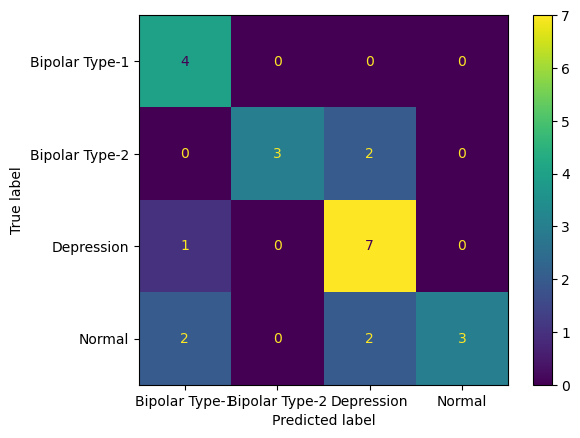

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot()
plt.show()

In [43]:
# Try to simplify the diagose as "nomal" and "non-nomal", then compare the new accurency
new_Mental_Disorders=clean_Mental_Disorders
new_Mental_Disorders['Expert_Diagnose'].replace(['Bipolar Type-2', 'Depression', 'Bipolar Type-1'], 'abnormal', inplace=True)
Diagnose=list(set(new_Mental_Disorders['Expert_Diagnose']))
print(Diagnose)
print(new_Mental_Disorders.head())

['abnormal', 'Normal']
  Sadness Euphoric Exhausted Sleep_dissorder  Mood_Swing  Suicidal_thoughts  \
0       3        0         1               1           1                  1   
1       3        0         3               1           0                  1   
2       1        2         1               1           1                  0   
3       3        0         3               2           1                  1   
4       3        3         1               1           0                  0   

   Anorxia  Authority_Respect  Try-Explanation  Aggressive_Response  \
0        0                  0                1                    0   
1        0                  0                0                    0   
2        0                  0                1                    1   
3        1                  0                1                    0   
4        0                  0                0                    0   

   Ignore_Move_On  Nervous-Breakdown  Admit_Mistakes  Overthinking  \
0    

In [44]:
#run the knn again

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = new_Mental_Disorders.drop('Expert_Diagnose', axis=1)
y = new_Mental_Disorders['Expert_Diagnose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_features = ['Sadness','Euphoric','Exhausted','Exhausted',]
binary_features = ['Mood_Swing','Suicidal_thoughts','Anorxia','Authority_Respect','Try-Explanation','Aggressive_Response','Ignore_Move_On','Nervous-Breakdown','Admit_Mistakes','Overthinking']
numerical_features = ['Sexual_Activity','Concentration','Optimisim']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('binary', 'passthrough', binary_features)
    ])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) #glad to see the improvement of the prediction!!!

Accuracy: 0.8333333333333334


In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 3,  4],
       [ 0, 17]])

In [46]:
import numpy as np
classes = np.unique(y_train)
print("Classes:", classes)


Classes: ['Normal' 'abnormal']


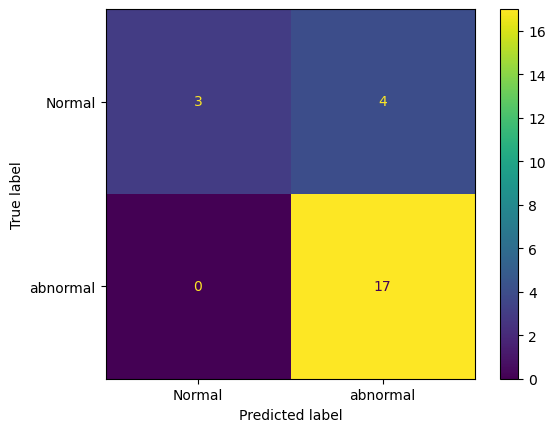

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot()
plt.show()

<h4>In conclusion:</h4> The accuracy of the KNN model stands at only 71%, falling short of expectations. 
ChatGPT
The KNN model faces difficulty distinguishing between bipolar type II and depression, often misclassifying normal individuals as bipolar type I or depressed. However, it demonstrates high accuracy in identifying bipolar type I individuals.
    Further, by simplifying the model to predict a binary outcome—normal or non-normal—the accuracy can be  improved to 83%.  The error lies in the "false non-normal" prediction, which may cause unease among people, but it is preferable to a "false normal" prediction

<h4>Part II:</h4> 

<h2>Data Understanding</h2>
Examining the data before we prepare it for modelling

In [48]:
#importing the pandas library
import pandas as pd

# Load the dataset
url='Dataset-Mental-Disorders.csv'
df=pd.read_csv(url)

In [49]:
# Display the first 5 rows of the dataset
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [50]:
# Describe the dataset
df.describe(include = 'all')

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [51]:
# Check for missing values
df.isnull().sum()

# No missing values detected. Awesome!

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [52]:
#delete the first column in the dataframe since it is irrelevant for modelling
df = df.drop(df.columns[0], axis=1)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [53]:
# The unique values for each column of the dataset
for column in df.columns:
    print("Unique values in", column, "are:")
    print(df[column].unique())
    print('\n')

# YES value detected twice (due to extra space) in column Suicidal_thoughts

Unique values in Sadness are:
['Usually' 'Sometimes' 'Seldom' 'Most-Often']


Unique values in Euphoric are:
['Seldom' 'Most-Often' 'Usually' 'Sometimes']


Unique values in Exhausted are:
['Sometimes' 'Usually' 'Seldom' 'Most-Often']


Unique values in Sleep dissorder are:
['Sometimes' 'Most-Often' 'Usually' 'Seldom']


Unique values in Mood Swing are:
['YES' 'NO']


Unique values in Suicidal thoughts are:
['YES ' 'YES' 'NO']


Unique values in Anorxia are:
['NO' 'YES']


Unique values in Authority Respect are:
['NO' 'YES']


Unique values in Try-Explanation are:
['YES' 'NO']


Unique values in Aggressive Response are:
['NO' 'YES']


Unique values in Ignore & Move-On are:
['NO' 'YES']


Unique values in Nervous Break-down are:
['YES' 'NO']


Unique values in Admit Mistakes are:
['YES' 'NO']


Unique values in Overthinking are:
['YES' 'NO']


Unique values in Sexual Activity are:
['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 1

In [54]:
# Count of values in Expert Diagnose
df['Expert Diagnose'].value_counts()

Expert Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

<h2>Data Preparation</h2>
Selecting the data that will be used for the modelling phase, cleaning any neccesary data,
reformatting categorical data from string inputs to integers, and standardization of data scales

In [55]:
#cleaned version of the dataframe
clean_df = df.copy()
clean_df.columns

#Remove spaces from column names
clean_df.columns = clean_df.columns.str.replace(' ', '_')
clean_df.head()


,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_&_Move-On,Nervous_Break-down,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [56]:
#rcolumn names replaced with correct spelling for better understanding
clean_df.columns = clean_df.columns.str.replace('Sleep_dissorder', 'Sleep_disorder')
clean_df.columns = clean_df.columns.str.replace('Anorxia', 'Anorexia')
clean_df.columns = clean_df.columns.str.replace('Try-Explanation', 'Try_explanation')
clean_df.columns = clean_df.columns.str.replace('Ignore_&_Move-On', 'Ignore_MoveOn')
clean_df.columns = clean_df.columns.str.replace('Nervous_Break-down', 'Nervous_Breakdown')
clean_df.columns = clean_df.columns.str.replace('Optimisim', 'Optimism')
clean_df.columns = clean_df.columns.str.replace('Expert_Diagnose', 'Expert_Diagnosis')

In [57]:
#overview of the cleaned dataset
clean_df.describe(include = 'all')

,Sadness,Euphoric,Exhausted,Sleep_disorder,Mood_Swing,Suicidal_thoughts,Anorexia,Authority_Respect,Try_explanation,Aggressive_Response,Ignore_MoveOn,Nervous_Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimism,Expert_Diagnosis
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [58]:
#extra space removed in the column Suicidal_thoughts
clean_df['Suicidal_thoughts'] = clean_df['Suicidal_thoughts'].str.replace('YES ', 'YES')

#unique values for the column Suicidal_thoughts
print("Unique values in Suicidal_thoughts are:", clean_df['Suicidal_thoughts'].unique())

Unique values in Suicidal_thoughts are: ['YES' 'NO']


In [59]:
#change the binary features
clean_df.replace(('YES', 'NO'), (1, 0), inplace=True)
clean_df.head()

,Sadness,Euphoric,Exhausted,Sleep_disorder,Mood_Swing,Suicidal_thoughts,Anorexia,Authority_Respect,Try_explanation,Aggressive_Response,Ignore_MoveOn,Nervous_Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimism,Expert_Diagnosis
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [60]:
#changes the categorical features of columns using likert scale
clean_df.replace(('Usually', 'Most-Often','Sometimes','Seldom'), ('3','2','1','0'), inplace=True)
clean_df.head()

,Sadness,Euphoric,Exhausted,Sleep_disorder,Mood_Swing,Suicidal_thoughts,Anorexia,Authority_Respect,Try_explanation,Aggressive_Response,Ignore_MoveOn,Nervous_Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimism,Expert_Diagnosis
0,3,0,1,1,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,3,0,3,1,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,1,2,1,1,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,3,0,3,2,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,3,3,1,1,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [61]:
#Replaces 'From 10' in the values with nothing
clean_df.replace('From 10', '', regex=True, inplace=True)


In [62]:
#changes the categorical values of Expert Diagnosis to numerical values
clean_df.replace(('Normal','Bipolar Type-1','Bipolar Type-2','Depression'),
                 ('0','1','2','3'), inplace=True)
clean_df.head()

,Sadness,Euphoric,Exhausted,Sleep_disorder,Mood_Swing,Suicidal_thoughts,Anorexia,Authority_Respect,Try_explanation,Aggressive_Response,Ignore_MoveOn,Nervous_Breakdown,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimism,Expert_Diagnosis
0,3,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,3,0,3,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,2,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,3,0,3,2,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,3,3,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


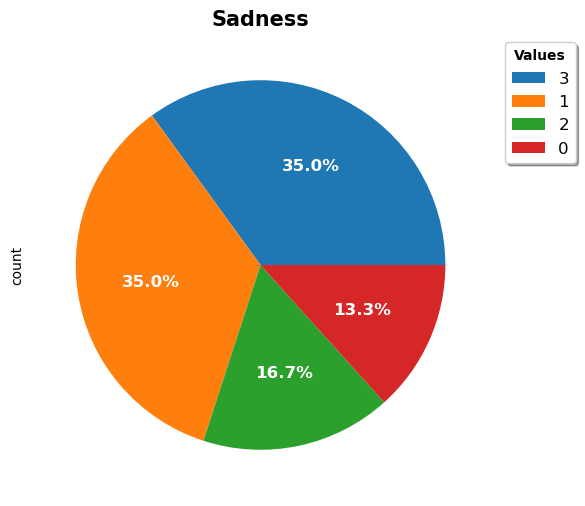

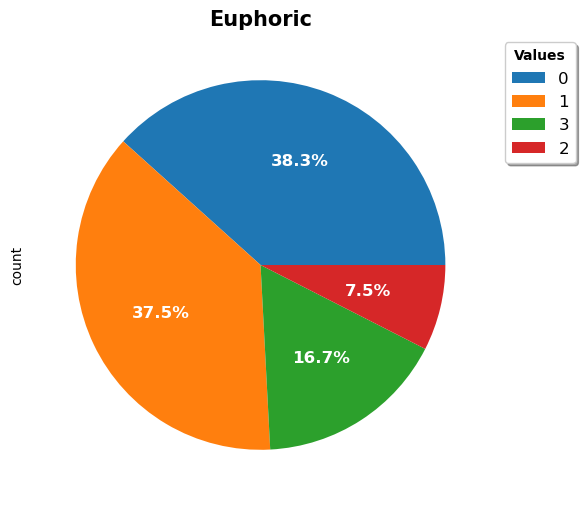

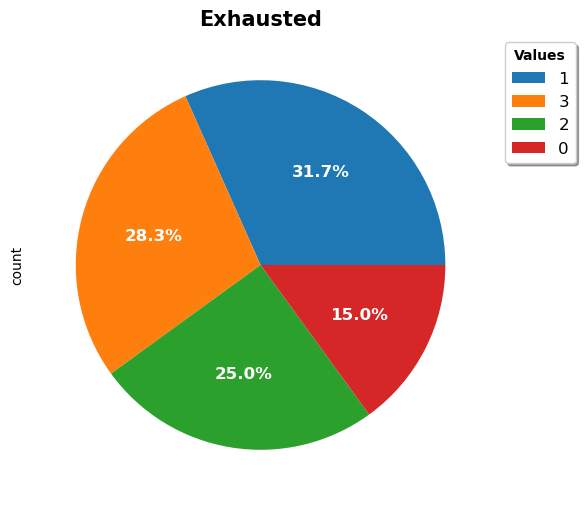

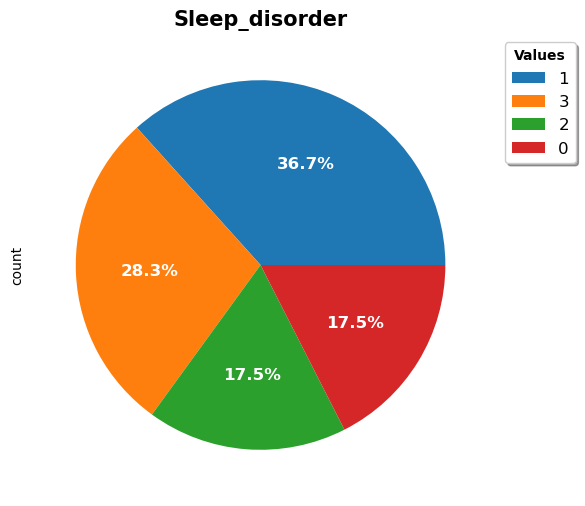

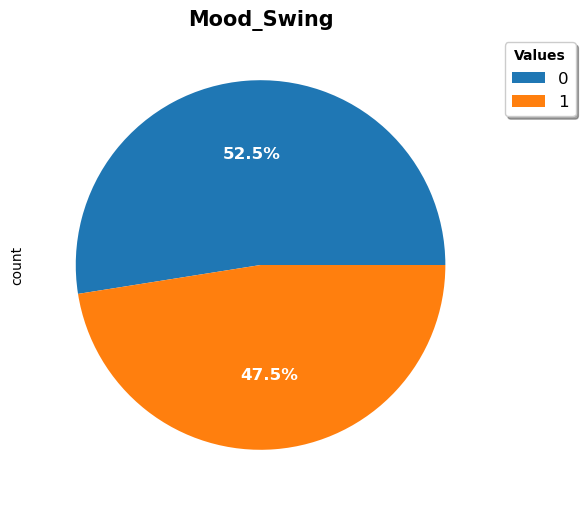

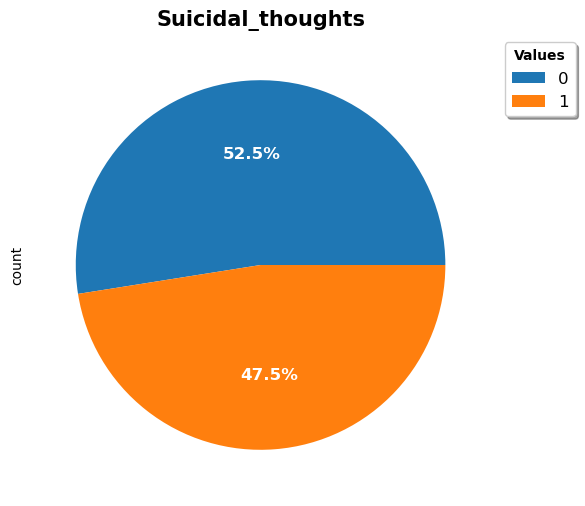

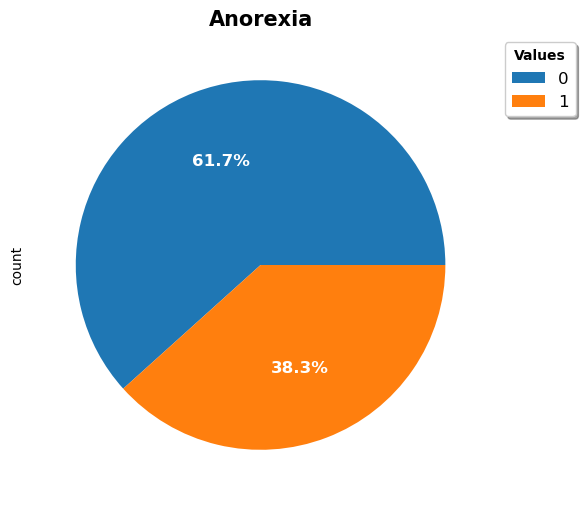

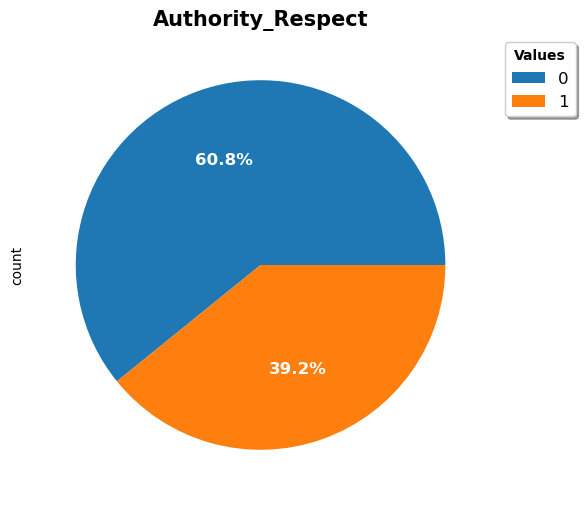

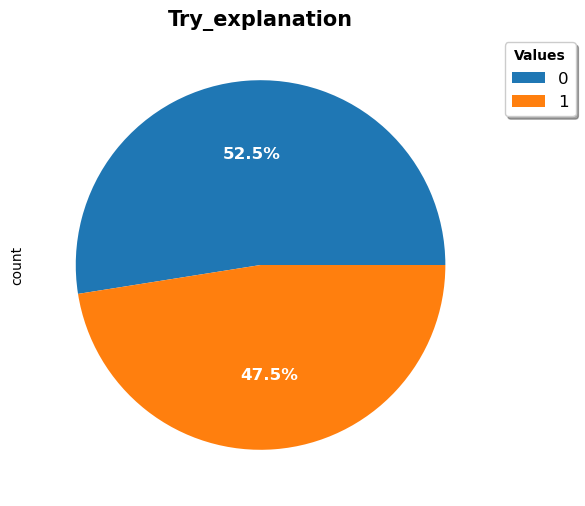

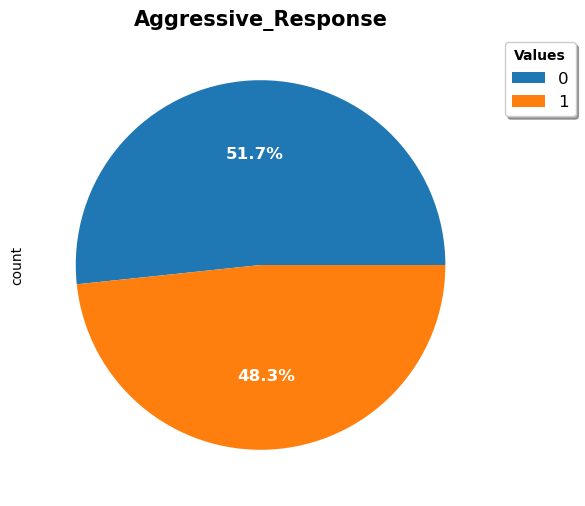

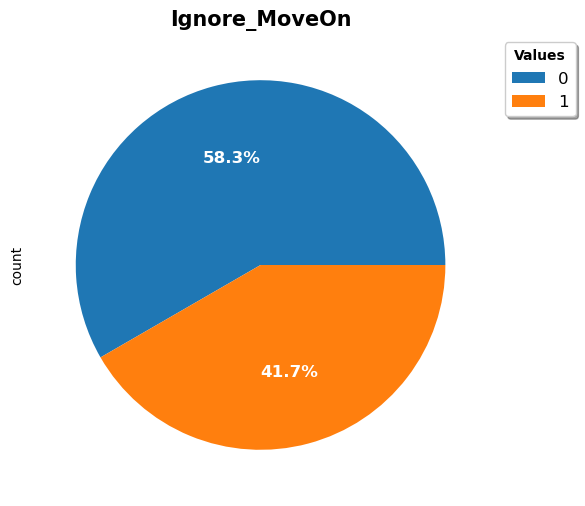

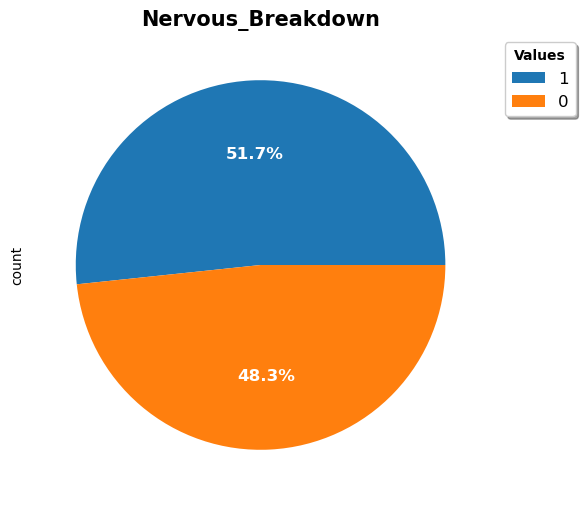

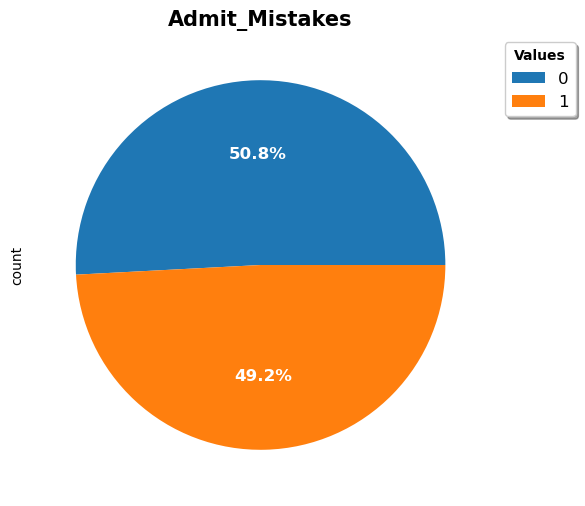

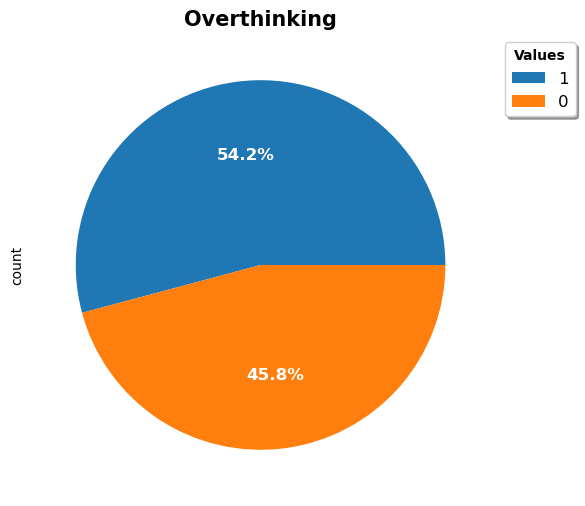

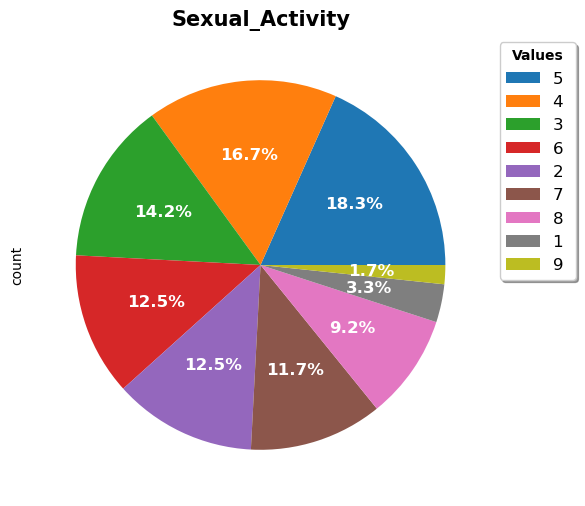

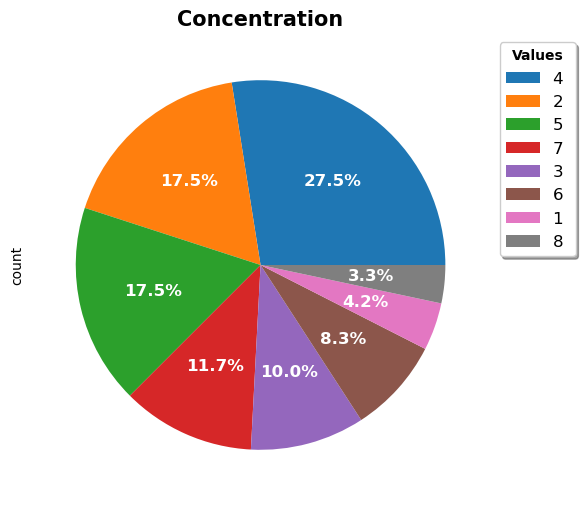

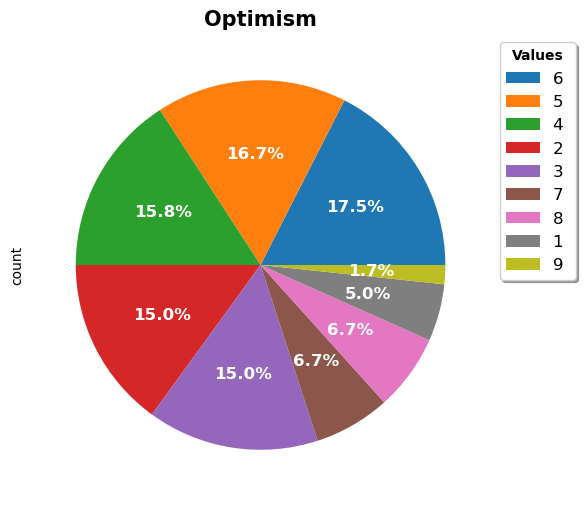

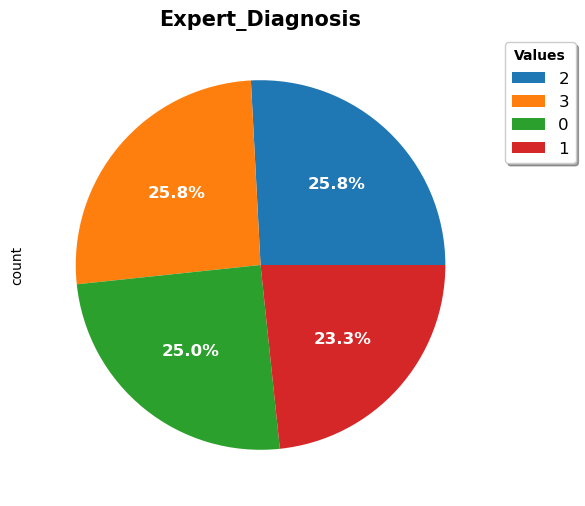

In [63]:
#shows the distribution in percentages for all columns in a pie chart
import matplotlib.pyplot as plt
for column in clean_df.columns:
    clean_df[column].value_counts().plot.pie(textprops={'fontsize': 12, 'fontweight':'bold', 'color':'white'}, autopct='%1.1f%%', figsize=(6, 6))
    plt.title(label=column, fontsize=15, fontweight='bold', color='black')
    plt.legend(loc='upper right', fontsize=12, title='Values', title_fontproperties ={'weight': 'bold'}, shadow=True, fancybox=True, bbox_to_anchor=(1.2, 1))
    plt.show()


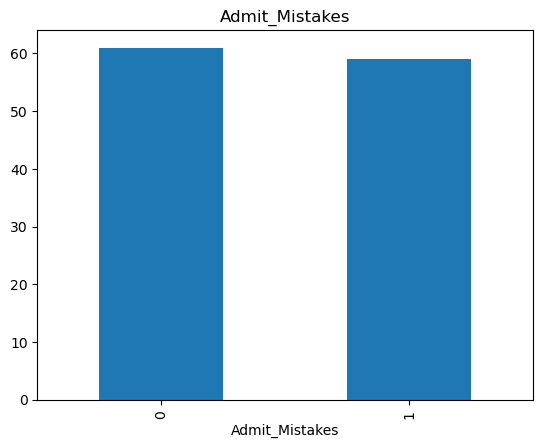

<Figure size 100x100 with 0 Axes>

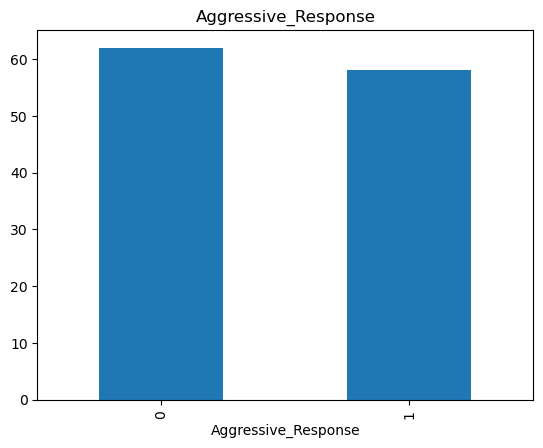

<Figure size 100x100 with 0 Axes>

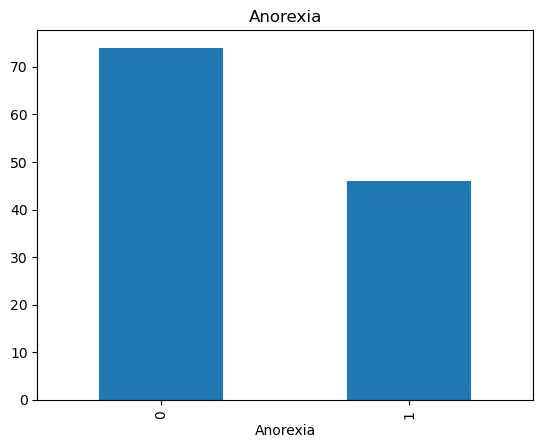

<Figure size 100x100 with 0 Axes>

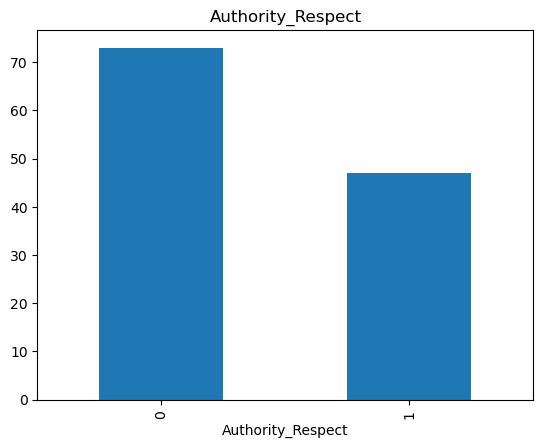

<Figure size 100x100 with 0 Axes>

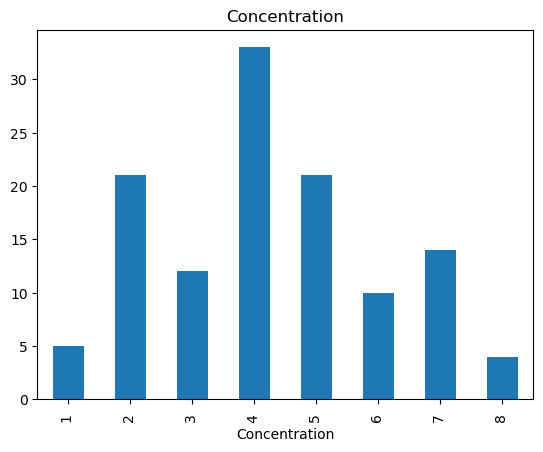

<Figure size 100x100 with 0 Axes>

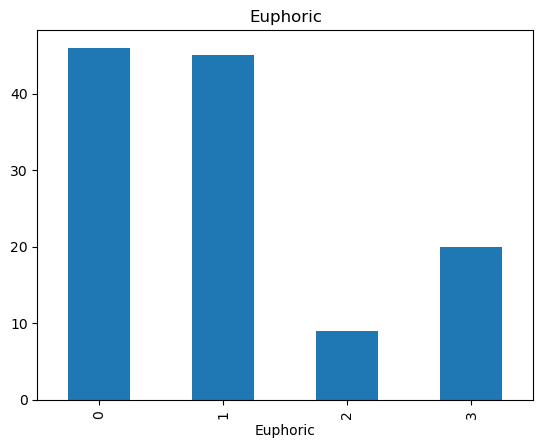

<Figure size 100x100 with 0 Axes>

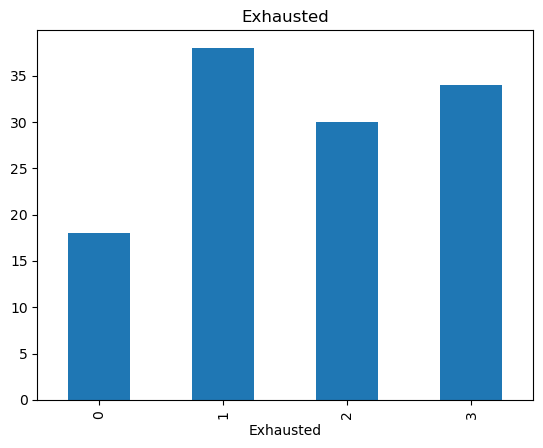

<Figure size 100x100 with 0 Axes>

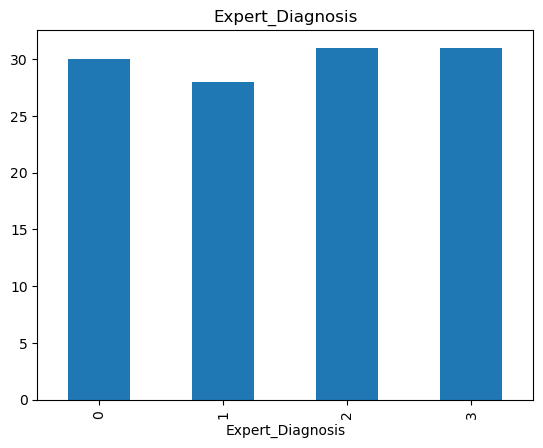

<Figure size 100x100 with 0 Axes>

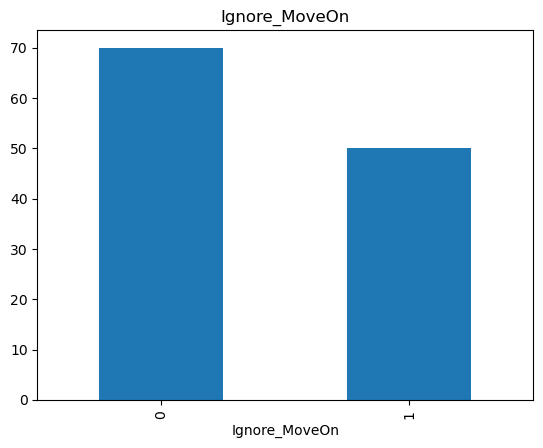

<Figure size 100x100 with 0 Axes>

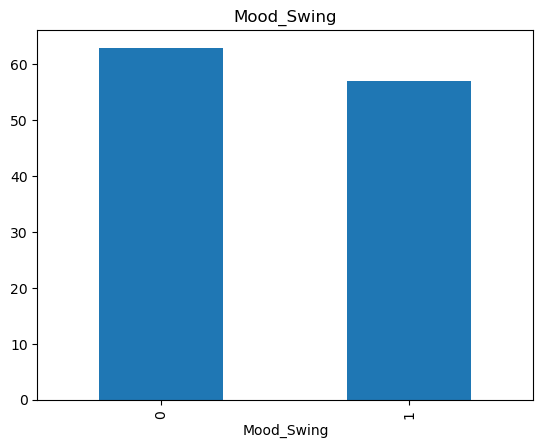

<Figure size 100x100 with 0 Axes>

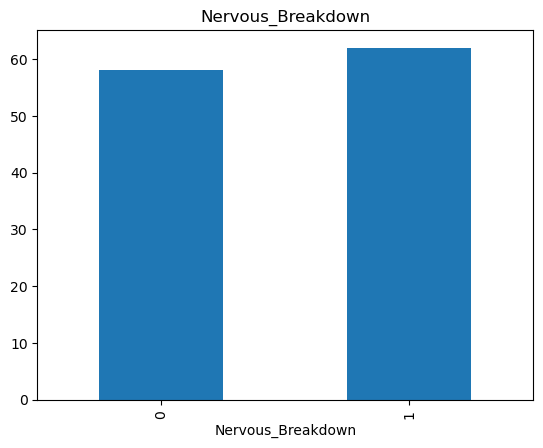

<Figure size 100x100 with 0 Axes>

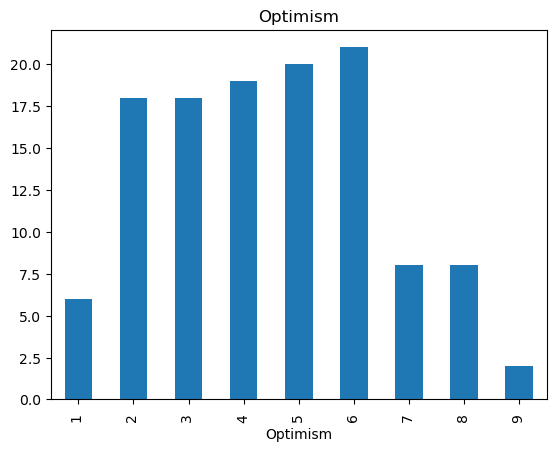

<Figure size 100x100 with 0 Axes>

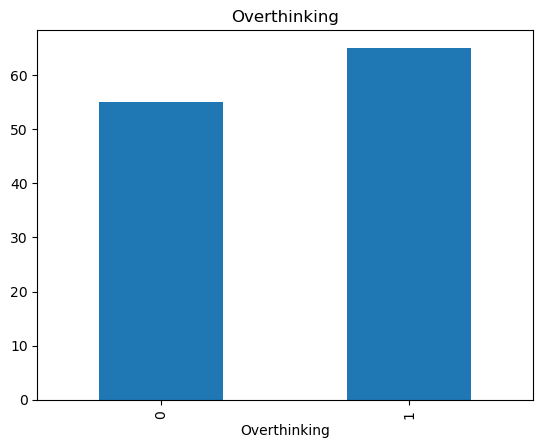

<Figure size 100x100 with 0 Axes>

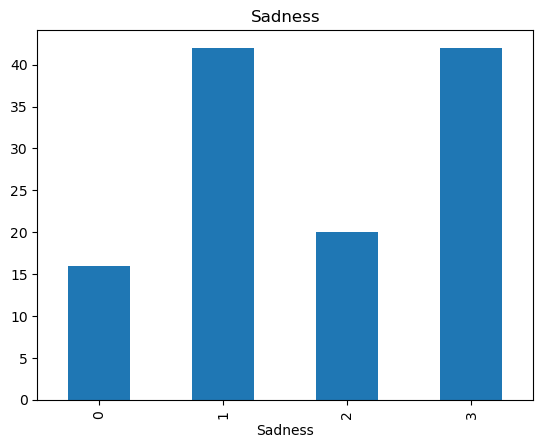

<Figure size 100x100 with 0 Axes>

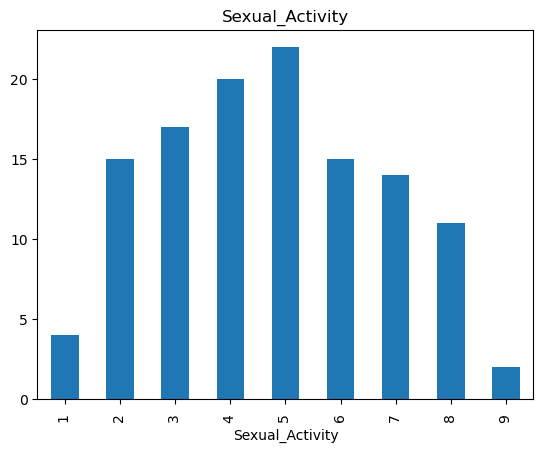

<Figure size 100x100 with 0 Axes>

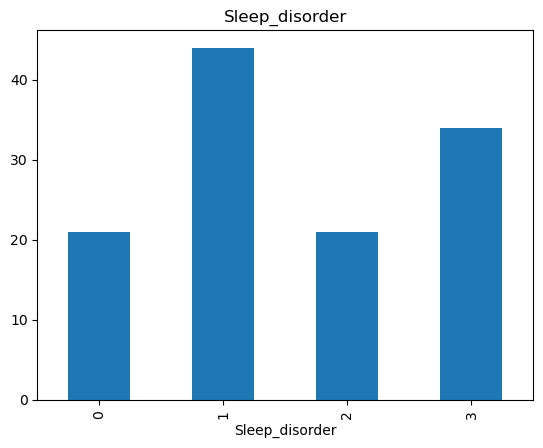

<Figure size 100x100 with 0 Axes>

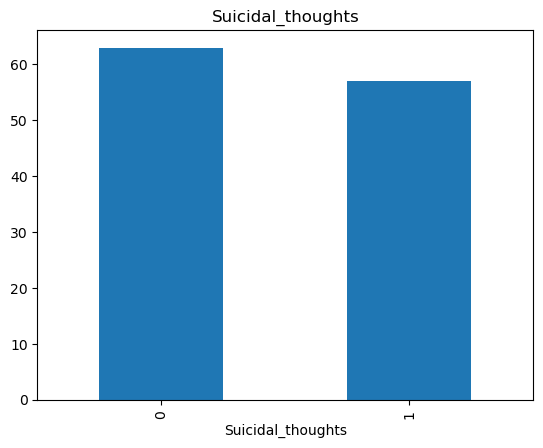

<Figure size 100x100 with 0 Axes>

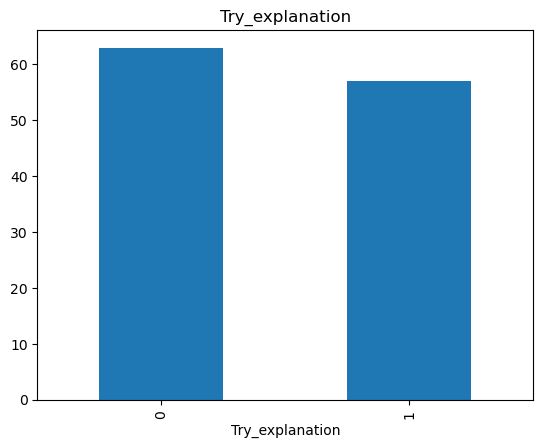

<Figure size 100x100 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt

#Sorts the columns by value type starting from the lowest
sorted_columns = clean_df.columns.sort_values()

#Plots the bar chart for each column
for column in sorted_columns:
    clean_df[column].value_counts().sort_index().plot.bar()
    plt.title(column)
    plt.figure(figsize=(1, 1))
    plt.show()


<h2>Data Modelling</h2>
After preparing the data, now we'll split the data into train and test sets to evaluate the models performance
For the model, MultinomialNB Naive Bayes (MultinomialNB) will be used.

In [65]:
from sklearn.model_selection import train_test_split

#Split the data into independent variables (X) and dependent variable (y)
X = clean_df.drop('Expert_Diagnosis', axis=1)
y = clean_df['Expert_Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [66]:
# Create a Multinomial Naive Bayes model and trains the model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#predictions
y_pred = nb_model.predict(X_test)

Accuracy of the model is: 0.875
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         8

    accuracy                           0.88        24
   macro avg       0.90      0.89      0.88        24
weighted avg       0.90      0.88      0.86        24



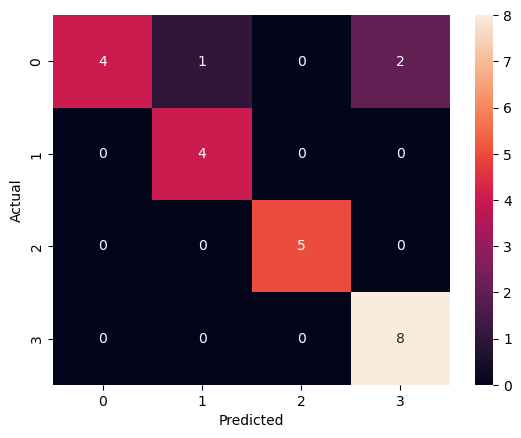

In [67]:
# Accuracy score and Classification report of the model
from sklearn.metrics import accuracy_score, classification_report

#accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is:", accuracy)

#confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
heatmap_confusion = sns.heatmap(conf_matrix, annot=True)
heatmap_confusion.set(xlabel="Predicted", ylabel="Actual")

# Classification report
print(classification_report(y_test, y_pred))


<h4>Accuracy evaluation:</h4>
Currently the overall model has an acceptable accuracy of 87.5%, classifying all people with a mental disorder correctly.<br>
However, it does fail to predict some people with a 'normal' diagnosis, and classifies them as either Bipolar type-1 (1 person) or Depression (2 people).
<br><br>
This indicates that the model is a bit on the careful side with regards to classifying people as 'normal'. <br>
A misdiagnoses of 'normal' could lead someone to not get the care they need, so this safety is seen as a good thing.<br>


<h4>Discussion on accuracy score:</h4>
Accuracy score, however, does not take into account the distribution of the data. In this case, where the diagnoses are evenly distributed, this is less of a problem.<br>
If a representative sample were taken from the population, the distribution would shift since mental disorder prevalence is much lower in real life.<br>
Depressive disorders in a given year only occur in 3.4% of the population and Bipolar disorder only occurs in 0.5% of the population.<br>
Since this dataset is not representative for the total population, the F1-score should be included if the model continues to be used on a growing dataset.<br>
Currently the F1-score, which does take the distribution of data into account, currently has a weighted average score of 86%, which is still very good.<br>


<h4>Next steps:</h4>
With the current data available, the accuracy of the model and the way the false prediction occur, would suit the business objective that was said out.<br>
Now we are going to test some more models to see if the accuracy can be further improved.
<br><br>

1. Optimizing the Alpha parameter of the model:
Using the alpha parameter to apply smoothing in Naive Bayes model to the data is something worth considering since the dataset is quite sparse with limited counts of each diagnosis.
<br>

2. Combining the disorders into a single 'abnormal' to compare against 'normal' diagnosis. In this case, since the diagnosis variable is inbalanced, the F1-score would be looked at for improvement
<br>

3. Trying more machine learning models for increased accuracy and F1-scores

In [68]:
# 1. Optimizing the Alpha parameter of the model (using GridSearchCV)

from sklearn.model_selection import GridSearchCV

# Create a dictionary of parameters for alpha to test in Grid Search
param_grid = {
    'alpha': [100, 10, 1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01, 0.001]
}

#Create new MultinomialNB model with alpha parameter
nb_model2 = MultinomialNB(alpha=param_grid['alpha'])

# Create a GridSearchCV object
nb_grid = GridSearchCV(estimator=nb_model2, param_grid=param_grid, cv=5)

# Train the model
nb_grid.fit(X_train, y_train)

# Get the best parameters
print("Best parameters are:", nb_grid.best_params_)
print("Best score is:", nb_grid.best_score_)
print("Best estimator is:", nb_grid.best_estimator_)
print("Best index is:", nb_grid.best_index_)
print("Scorer is:", nb_grid.scorer_)


Best parameters are: {'alpha': 1}
Best score is: 0.8657894736842104
Best estimator is: MultinomialNB(alpha=1)
Best index is: 2
Scorer is: <sklearn.metrics._scorer._PassthroughScorer object at 0x16a08d290>


Accuracy of the model is: 0.875
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         8

    accuracy                           0.88        24
   macro avg       0.90      0.89      0.88        24
weighted avg       0.90      0.88      0.86        24



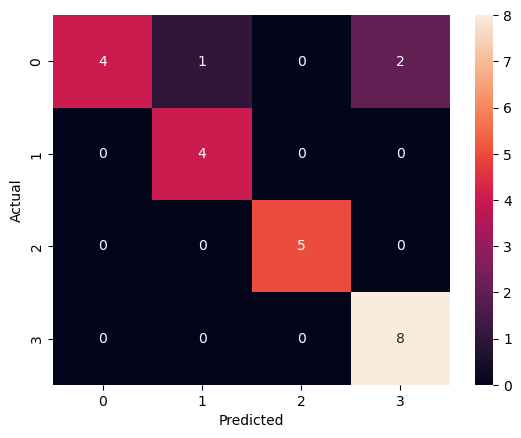

In [69]:
# Test the new model with the best parameters
nb_model2 = MultinomialNB(alpha=nb_grid.best_params_['alpha'])
nb_model2.fit(X_train, y_train)

y_pred2 = nb_model2.predict(X_test)

# accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy of the model is:", accuracy2)

# confusion matrix using heatmap
conf_matrix2 = confusion_matrix(y_test, y_pred2)
heatmap_confusion2 = sns.heatmap(conf_matrix2, annot=True)
heatmap_confusion2.set(xlabel="Predicted", ylabel="Actual")

# Classification report
print(classification_report(y_test, y_pred2))

# Using GridSearchCV to optimize the model did not improve the accuracy of the model. 
# The accuracy of the model is still the same as before, since the default alpha parameter of the model is already the best parameter for the model.

Accuracy of the model is: 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.81      1.00      0.89        17

    accuracy                           0.83        24
   macro avg       0.90      0.71      0.75        24
weighted avg       0.87      0.83      0.81        24



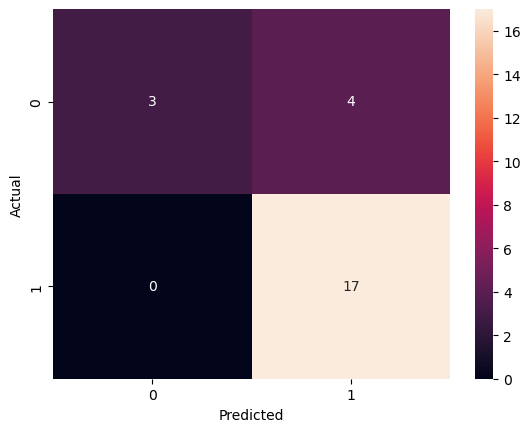

In [70]:
# 2. Combining the disorders into a single 'abnormal' to compare against 'normal' diagnosis.

# Combining disorders into a single 'abnormal' diagnosis
y_train_abnormal = y_train.replace(['1', '2', '3'], '1')
y_test_abnormal = y_test.replace(['1', '2', '3'], '1')

# new Gaussian model and train the model
nb_model_3 = MultinomialNB()
nb_model_3.fit(X_train, y_train_abnormal)

# predictions
y_pred_3 = nb_model_3.predict(X_test)

# accuracy of the model
accuracy_3 = accuracy_score(y_test_abnormal, y_pred_3)
print("Accuracy of the model is:", accuracy_3)

# confusion matrix using heatmap
conf_matrix_3 = confusion_matrix(y_test_abnormal, y_pred_3)
heatmap_confusion_3 = sns.heatmap(conf_matrix_3, annot=True)
heatmap_confusion_3.set(xlabel="Predicted", ylabel="Actual")

# Classification report
print(classification_report(y_test_abnormal, y_pred_3))

# The accuracy of the model is 83%, which is lower than the previous model.
# The weighted average F1-score of the model is 0.81, which is also lower than the previous model.
# The original model is better than the model with combined disorders.

In [71]:
# 3. Trying more machine learning models for increased accuracy and F1-scores

# Import the libaries for the classification models to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC


# Create a list of models to test to use in for-loop later
listmodels = [
    ('Logistic Regression', LogisticRegression),
    ('Decision Tree', DecisionTreeClassifier),
    ('Random Forest', RandomForestClassifier),
    ('Support Vector Machine', SVC),
    ('Gradient Boosting', GradientBoostingClassifier),
    ('AdaBoost', AdaBoostClassifier)
]

# Test models and add the insights and the used setting to lists for later use
model_results = []
model_settings = []

# Looping through the previously mentioned models to test them with original train-test split
for model_name, model in listmodels:
    model = model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    
    # save results and settings of the model to the previously created lists
    model_results.append((model_name, accuracy, f1))
    model_settings.append((model_name, model.get_params()))

# Print the results of the models
for model in model_results:
    print(model)

# print the settings of the models
for model in model_settings:
    print(model)


('Logistic Regression', 0.9166666666666666, 0.9143518518518517)
('Decision Tree', 0.7083333333333334, 0.7146723646723646)
('Random Forest', 0.7916666666666666, 0.7835008129125777)
('Support Vector Machine', 0.7083333333333334, 0.7053030303030302)
('Gradient Boosting', 0.7916666666666666, 0.7835008129125777)
('AdaBoost', 0.75, 0.7379667116509222)
('Logistic Regression', {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False})
('Decision Tree', {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'})
('Random Forest', {'bootstrap': True, 'ccp_alpha': 0

/Users/gongweiying/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


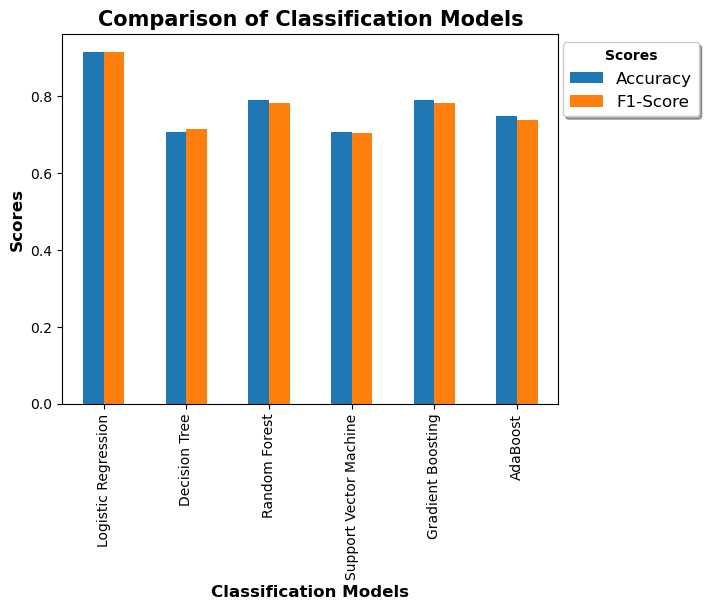

In [72]:
# compare the models results in a bar chart based on accuracy and F1-scores

# Create a DataFrame of the model results to use in the bar chart
model_results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'F1-Score'])
model_results_df.set_index('Model', inplace=True)
model_results_df.plot(kind='bar')

# Add labels, titles and other styling for aesthetics
plt.title(label='Comparison of Classification Models', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Classification Models', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Scores', fontsize=12, fontweight='bold', color='black')
plt.legend(loc='upper right', fontsize=12, title='Scores', title_fontproperties ={'weight': 'bold'}, shadow=True, fancybox=True, bbox_to_anchor=(1.3, 1))

# Show the bar chart
plt.show()

Accuracy of the model is: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         8

    accuracy                           0.92        24
   macro avg       0.95      0.93      0.93        24
weighted avg       0.93      0.92      0.91        24



/Users/gongweiying/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

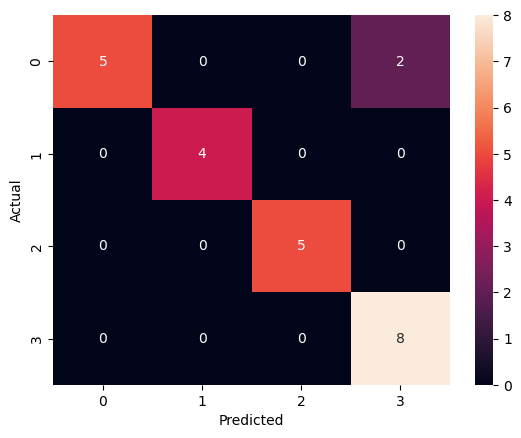

In [73]:
# create new logistic regression model with the best parameters that came from outputs of previous model comparison
best_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

# train the new model and make predictions
best_model.fit(X_train, y_train)
y_pred_lr = best_model.predict(X_test)

# the accuracy of the logistic regression model and confusion matrix using heatmap
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of the model is:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
heatmap_confusion_lr = sns.heatmap(conf_matrix_lr, annot=True)
heatmap_confusion_lr.set(xlabel="Predicted", ylabel="Actual")

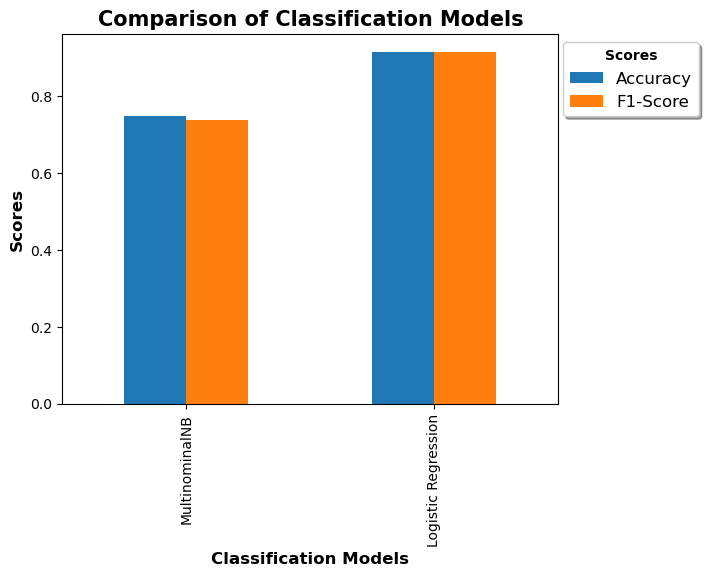

In [74]:
# compare original Naive Bayes model with the Logistic Regression model

# create a list of the two models that are going to be compared: the original MultinominalNB and the new Logistic Regression
model_results = [
    ('MultinominalNB', accuracy, classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']),
    ('Logistic Regression', accuracy_lr, classification_report(y_test, y_pred_lr, output_dict=True)['weighted avg']['f1-score'])
]

# compare the models and put the results in a bar chart
model_results_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy', 'F1-Score'])
model_results_df.set_index('Model', inplace=True)
model_results_df.plot(kind='bar')

# Labels and other asthetic styling
plt.title(label='Comparison of Classification Models', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Classification Models', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Scores', fontsize=12, fontweight='bold', color='black')
plt.legend(loc='upper right', fontsize=12, title='Scores', title_fontproperties ={'weight': 'bold'}, shadow=True, fancybox=True, bbox_to_anchor=(1.3, 1))

plt.show()


The comparison interpretation based on results <br>

Accuracy Score:<br>
The Naive Bayes model achieved an accuracy of 87.5%, while the Logistic Regression model achieved a higher accuracy of 91.67%.<br>
This indicates that the Logistic Regression model performed better in terms of correctly classifying the instances.
<br><br>
F1-score:<br>
The Naive Bayes model had an F1-score of 86%, while the Logistic Regression model had a higher F1-score of 91.44%. <br>
This suggests that the Logistic Regression model performed better in terms of overall model performance.
<br><br>
Based on these results, it can be concluded that the Logistic Regression model outperformed the Naive Bayes model in terms of accuracy, F1-score, and overall predictive performance <br>
Therefore, the Logistic Regression model would be the preferred model.

TO DO: ADD WEIYING'S MODEL TO THIS FILE AND COMPARE THIS WITH THE CHART ABOVE<br>
TO DO: REVIEW EACH OTHER'S NOTEBOOKS<br>
TO DO: ADD WEIYING'S MODEL TO DISCUSSION ABOVE<br>

FINAL TODO: SUGGESTIONS FOR NEXT STEPS

<h2>Suggested next steps</h2>

Bart's Suggestions
1. Implementation/deployment of the model<br>
A use case where the model uses the responses of sign-up forms from people who contacts a psychiatrist. Based on the responses to the 17 evaluation questions that are used for predictions, the psyciatrist will have an idea of the probable mental disorder of the patient, if any. This is of course, only if the accuracy of the model is satisfactory to the psychiatrist.<br>
2. Gathering more data<br> 
Since the current dataset is very sparse/limited, more data would help with building a more robust model for the prediction of mental disorders. This can be done through manual input into the system from new patients, for example.<br>
3. Experiment with new classification models<br>
The current Logistic Regression model is only one of few classification models and is the one that performs best out of the comparisons. However, this is only in the current situation. Throughout the evolution of the data set, trying different models regularly is advised.

Weiying's Suggestion
1. Increasing the prediction accuracy of bipolar type II and depression
Solving this problem will dramatically increase the overall prediction performance. We may try to remove some irrelevant features to optimized the test.